<a href="https://colab.research.google.com/github/ryanlei309/Air-quality-in-the-US/blob/main/Yuan_Chun_Lei_US_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read data and preprocess data**

In [3]:
poll = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dyson_interview/pollution_us_2000_2016.csv")

In [4]:
poll.head(5)

Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
3  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
4  2000-01-02  Parts per billion  ...  Parts per billion  1.958333   

   SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units   CO Mean  \
0                9.0                21    13.0  Parts per million  1.145833   
1                9.0                21    13.0  Parts per million  0.878947   
2                6.6                23     NaN  Parts per million  1.145833   
3                6.6                23     NaN  Parts per million  0.878947   
4                3.0                22     4.0  Parts per million  0.850000   

   CO 1st Max Value  CO 1st Max Hour CO AQI  
0               4.2               21    NaN  
1               2.2               23   25.0  
2               4.2               21    NaN  
3               2.2               23   25.0  
4               1.6               23    NaN  

[5 rows x 29 columns]

In [5]:
# Remove unnecessary columns
print(len(poll))

1746661


In [6]:
poll['Date Local'][0:5]

0    2000-01-01
1    2000-01-01
2    2000-01-01
3    2000-01-01
4    2000-01-02
Name: Date Local, dtype: object

In [7]:
# Check missing data
poll.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

### **Macro Trend of mean pollutant AQL over time - NO2 and O3**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning:

Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.



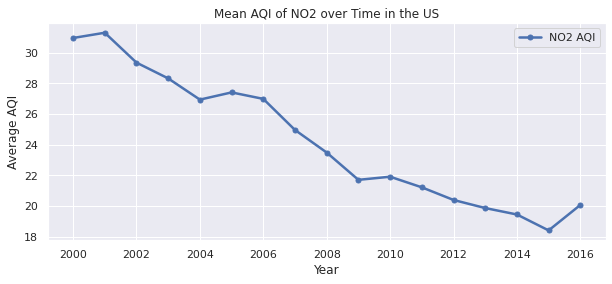

<Figure size 432x288 with 0 Axes>

In [8]:
sns.set_theme()

# Change the data type
df1 = poll
df1['Date Local'] = pd.to_datetime(df1['Date Local'],format='%Y-%m-%d')
df1['Year'] = df1['Date Local'].dt.year

# Plot the aggregate decrease of all pollutants
f, ax = plt.subplots(figsize=[10,4])
df1.groupby(['Year']).agg({'NO2 AQI': 'mean'})\
.plot(lw=2,marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean AQI of NO2 over Time in the US')
ax.set(xlabel="Year", ylabel="Average AQI")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Mean_AQI_US')

### **Find to correlation of NO2 and O3 in five most populated states and the US**

**The US**

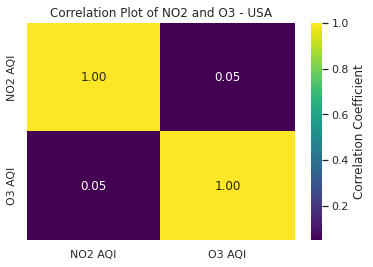

<Figure size 432x288 with 0 Axes>

In [9]:
Pollutants_us = df1[["NO2 AQI","O3 AQI"]]
Pollutants_us.index = df1["Date Local"]
sns.heatmap(Pollutants_us.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot of NO2 and O3 - USA")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Correlation_NO2O3_US')

**California**

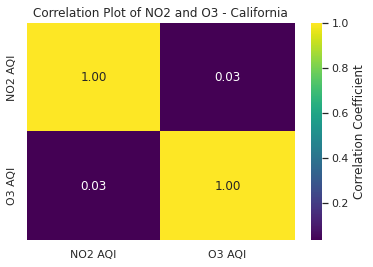

<Figure size 432x288 with 0 Axes>

In [10]:
cal = df1[df1.State == "California"]

Pollutants_cal = cal[["NO2 AQI","O3 AQI"]]
Pollutants_cal.index = cal["Date Local"]
sns.heatmap(Pollutants_cal.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot of NO2 and O3 - California")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Correlation_NO2O3_CA')

**Texas**

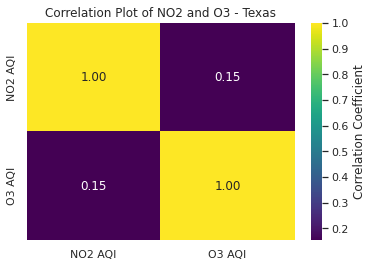

<Figure size 432x288 with 0 Axes>

In [11]:
tex = df1[df1.State == "Texas"]

Pollutants_tex = tex[["NO2 AQI","O3 AQI"]]
Pollutants_tex.index = tex["Date Local"]
sns.heatmap(Pollutants_tex.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot of NO2 and O3 - Texas")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Correlation_NO2O3_TX')

**New York**

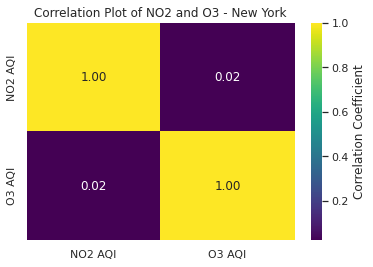

<Figure size 432x288 with 0 Axes>

In [12]:
ny = df1[df1.State == "New York"]

Pollutants_ny = ny[["NO2 AQI","O3 AQI"]]
Pollutants_ny.index = ny["Date Local"]
sns.heatmap(Pollutants_ny.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot of NO2 and O3 - New York")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Correlation_NO2O3_NY')

**Pennsylvania**

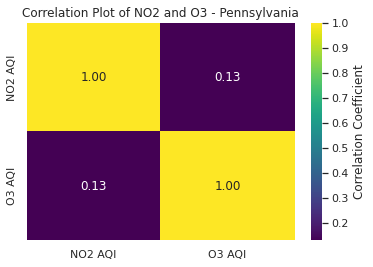

<Figure size 432x288 with 0 Axes>

In [13]:
penn = df1[df1.State == "Pennsylvania"]

Pollutants_penn = penn[["NO2 AQI","O3 AQI"]]
Pollutants_penn.index = penn["Date Local"]
sns.heatmap(Pollutants_penn.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot of NO2 and O3 - Pennsylvania")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Correlation_NO2O3_PN')

**Florida**

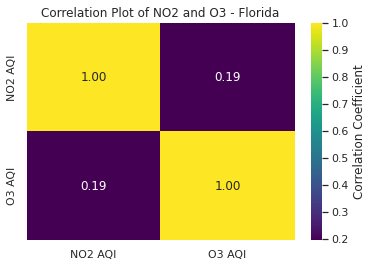

<Figure size 432x288 with 0 Axes>

In [14]:
flo = df1[df1.State == "Florida"]

Pollutants_flo = flo[["NO2 AQI","O3 AQI"]]
Pollutants_flo.index = flo["Date Local"]
sns.heatmap(Pollutants_flo.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot of NO2 and O3 - Florida")
plt.show()
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/Correlation_NO2O3_FL')

### **Conclusion: Low correlation in NO2 and O3 in five different states and the US**

###**Create NO2 and O3 line plot for the following states: California, Texas, New York, Pennsylvania, Florida. And include the US**

In [15]:
# Prepare all NO2 and O3 AQIs against state and date 
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI']]
# pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
# pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

# To extract 5 states and USA data, reset index
pollSt = pollSt.reset_index()

# Extract 5 states
state_list = ['California', 'Texas', 'New York', 'Pennsylvania', 'Florida']
pollSt_5 = pollSt[pollSt['State'].isin(state_list)]

# Calculate the average NO2 AQI and O3 AQI of the whole us
whole_US = pollSt.groupby(['Date Local']).mean()
whole_US['State'] = 'USA'
whole_US = whole_US.reset_index()
cols = whole_US.columns.tolist()
cols = ['State', 'Date Local', 'NO2 AQI', 'O3 AQI']
whole_US = whole_US[cols]

# Combine the five states and whole us dataframe
pollSt_6 = pd.concat([whole_US, pollSt_5])
pollSt_6.set_index(['State', 'Date Local'], inplace=True)

pollStGrouped_6 = pollSt_6.groupby(level=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Line plot by month-NO2**

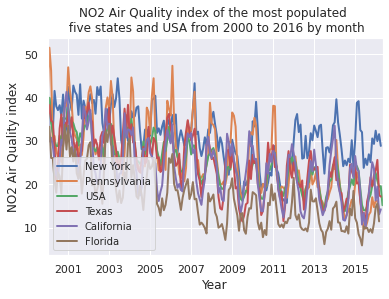

In [16]:
sns.set_theme()
sns.color_palette("bright")
# sns.lineplot(data = pollSt_6, x='Date Local', y='NO2 AQI')


pollNO2 = pollStGrouped_6['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(6).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot(linewidth=2)
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel('Year')
plt.ylabel('NO2 Air Quality index')
plt.title('NO2 Air Quality index of the most populated \n five states and USA from 2000 to 2016 by month')
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/line_plot_month_NO2')

**Line plot by quarter-NO2**

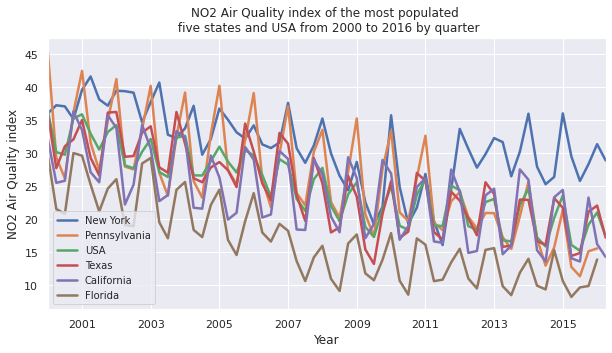

In [17]:
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='Q')).mean().plot(linewidth=2.5)
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['text.color'] = 'black'
plt.xlabel('Year')
plt.ylabel('NO2 Air Quality index')
plt.title('NO2 Air Quality index of the most populated \n five states and USA from 2000 to 2016 by quarter')
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/line_plot_quarter_NO2', bbox_inches='tight')

**Line plot by year-NO2**

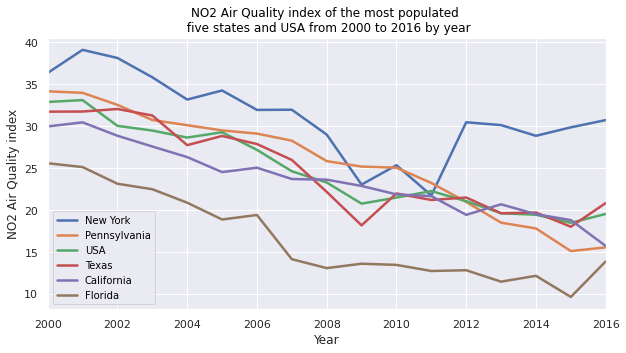

In [18]:
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='Y')).mean().plot(linewidth=2.5)
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel('Year')
plt.ylabel('NO2 Air Quality index')
plt.title('NO2 Air Quality index of the most populated \n five states and USA from 2000 to 2016 by year')
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/line_plot_year_NO2', bbox_inches='tight')

**Line plot by month-O3**

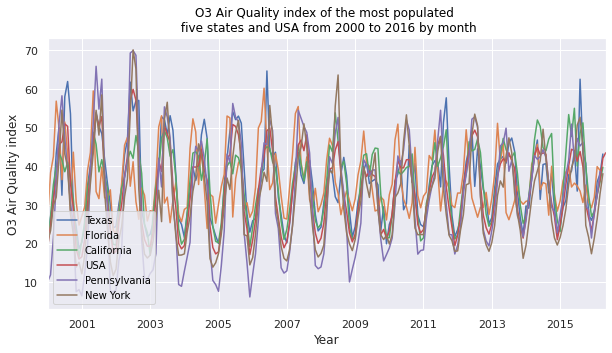

In [19]:
pollO3 = pollStGrouped_6['O3 AQI']
pollO3Top = pollO3.mean().nlargest(6).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot(linewidth=1.5)
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel('Year')
plt.ylabel('O3 Air Quality index')
plt.title('O3 Air Quality index of the most populated \n five states and USA from 2000 to 2016 by month')
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/line_plot_month_O3')

**Line plot by quarter-O3**

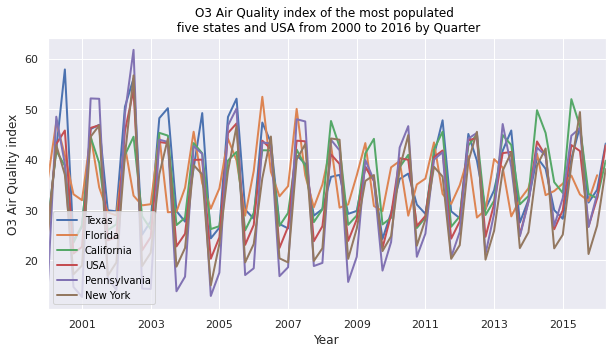

In [20]:
pollO3 = pollStGrouped_6['O3 AQI']
pollO3Top = pollO3.mean().nlargest(6).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='Q')).mean().plot(linewidth=2)
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel('Year')
plt.ylabel('O3 Air Quality index')
plt.title('O3 Air Quality index of the most populated \n five states and USA from 2000 to 2016 by Quarter')
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/line_plot_quarter_O3')

**Line plot by year-O3**

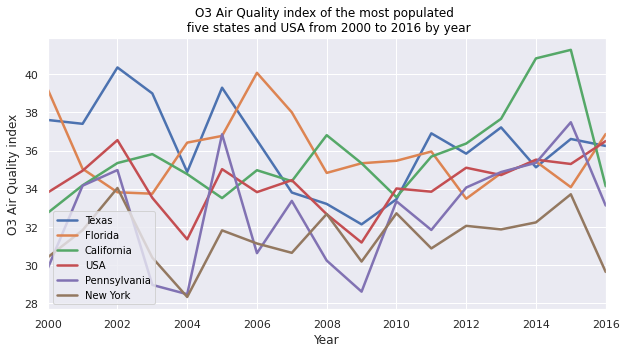

In [21]:
pollO3 = pollStGrouped_6['O3 AQI']
pollO3Top = pollO3.mean().nlargest(6).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='y')).mean().plot(linewidth=2.5)
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel('Year')
plt.ylabel('O3 Air Quality index')
plt.title('O3 Air Quality index of the most populated \n five states and USA from 2000 to 2016 by year')
plt.savefig('drive/MyDrive/Colab Notebooks/Dyson_interview/line_plot_year_O3')

### **Create US map to show the color change by year of NO2 and O3**

In [22]:
pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import plotly.express as px

In [24]:
pollSt_5.set_index(['State', 'Date Local'], inplace=True)

In [25]:
df_NO2andO3 = pollSt_5.groupby([pd.Grouper(level='Date Local',freq='y'), 'State']).mean()
df_NO2 = df_NO2andO3[['NO2 AQI']]
df_O3 = df_NO2andO3[['O3 AQI']]

**NO2**

In [26]:
# Create state_code column
df_NO2 = df_NO2.reset_index()

In [27]:
# Calculate the changing rate of NO2 AQI in NY
df_NY_NO2 = df_NO2[df_NO2['State'] == 'New York']
NY_2000_NO2 = df_NY_NO2.iloc[[0]]['NO2 AQI'].item()
NY_2016_NO2 = df_NY_NO2.iloc[[16]]['NO2 AQI'].item()

NY_rate = ((NY_2016_NO2 - NY_2000_NO2) / NY_2000_NO2)
print(f"NO2 AQI changing rate {NY_rate}% in NY")

# Calculate the changing rate of NO2 AQI in FL
df_FL_NO2 = df_NO2[df_NO2['State'] == 'Florida']
FL_2000_NO2 = df_FL_NO2.iloc[[0]]['NO2 AQI'].item()
FL_2016_NO2 = df_FL_NO2.iloc[[16]]['NO2 AQI'].item()

FL_rate = ((FL_2016_NO2 - FL_2000_NO2) / FL_2000_NO2)
print(f"NO2 AQI changing rate {FL_rate}% in FL")

# Calculate the changing rate of NO2 AQI in CA
df_CA_NO2 = df_NO2[df_NO2['State'] == 'California']
CA_2000_NO2 = df_CA_NO2.iloc[[0]]['NO2 AQI'].item()
CA_2016_NO2 = df_CA_NO2.iloc[[16]]['NO2 AQI'].item()

CA_rate = ((CA_2016_NO2 - CA_2000_NO2) / CA_2000_NO2)
print(f"NO2 AQI changing rate {CA_rate}% in CA")

# Calculate the changing rate of NO2 AQI in TX
df_TX_NO2 = df_NO2[df_NO2['State'] == 'Texas']
TX_2000_NO2 = df_TX_NO2.iloc[[0]]['NO2 AQI'].item()
TX_2016_NO2 = df_TX_NO2.iloc[[16]]['NO2 AQI'].item()

TX_rate = ((TX_2016_NO2 - TX_2000_NO2) / TX_2000_NO2)
print(f"NO2 AQI changing rate {TX_rate}% in TX")

# Calculate the changing rate of NO2 AQI in PA
df_PA_NO2 = df_NO2[df_NO2['State'] == 'Pennsylvania']
PA_2000_NO2 = df_PA_NO2.iloc[[0]]['NO2 AQI'].item()
PA_2016_NO2 = df_PA_NO2.iloc[[16]]['NO2 AQI'].item()

PA_rate = ((PA_2016_NO2 - PA_2000_NO2) / PA_2000_NO2)
print(f"NO2 AQI changing rate {PA_rate}% in PA")

NO2 AQI changing rate -0.1549010972595609% in NY
NO2 AQI changing rate -0.45813457193070545% in FL
NO2 AQI changing rate -0.4759457121086567% in CA
NO2 AQI changing rate -0.3437574525770165% in TX
NO2 AQI changing rate -0.5452540048393552% in PA


In [28]:
df_NO2andO3_byQ = pollSt_5.groupby([pd.Grouper(level='Date Local',freq='Q')]).mean()
df_NO2_byQ = df_NO2andO3_byQ[['NO2 AQI']]

In [29]:
df_NO2_byQ = df_NO2_byQ.reset_index()

In [30]:
df_NO2_byQ.head(20)

Date Local    NO2 AQI
0  2000-03-31  35.970863
1  2000-06-30  28.298842
2  2000-09-30  28.226341
3  2000-12-31  33.859557
4  2001-03-31  36.023111
5  2001-06-30  31.031491
6  2001-09-30  27.762623
7  2001-12-31  33.764300
8  2002-03-31  35.341295
9  2002-06-30  27.602115
10 2002-09-30  28.105387
11 2002-12-31  32.807107
12 2003-03-31  34.394008
13 2003-06-30  27.543506
14 2003-09-30  24.801267
15 2003-12-31  31.744391
16 2004-03-31  32.400818
17 2004-06-30  25.821898
18 2004-09-30  23.550237
19 2004-12-31  28.949146

In [31]:
# Calculate the changing average in summer time than winter time
average_change_AQI_lst = []

AQI_in_year = []
for i in range(len(df_NO2_byQ)):
  date = df_NO2_byQ.iloc[[i]]['Date Local'].item()

  if date.month == 9:
    AQI_in_year.append(df_NO2_byQ.iloc[[i]]['NO2 AQI'].item())
  if date.month == 3:
    AQI_in_year.append(df_NO2_byQ.iloc[[i]]['NO2 AQI'].item())

  if len(AQI_in_year) == 2:
    AQI_increase_rate = ((AQI_in_year[1] - AQI_in_year[0]) / AQI_in_year[0])
    average_change_AQI_lst.append(AQI_increase_rate)
    AQI_in_year = []

print(sum(average_change_AQI_lst)/ len(average_change_AQI_lst))


-0.3007264268359703


In [32]:
state_list = df_NO2['State'].to_list()
state_code = []
for s in state_list:
  if s == 'California':
    state_code.append('CA')
  elif s == 'Texas':
    state_code.append('TX')
  elif s == 'New York':
    state_code.append('NY')
  elif s == 'Florida':
    state_code.append('FL')
  elif s == 'Pennsylvania':
    state_code.append('PA')

df_NO2['state_code'] = state_code

df_NO2.head(5)

Date Local         State    NO2 AQI state_code
0 2000-12-31    California  29.967458         CA
1 2000-12-31       Florida  25.573034         FL
2 2000-12-31      New York  36.359381         NY
3 2000-12-31  Pennsylvania  34.161428         PA
4 2000-12-31         Texas  31.733379         TX

In [33]:
# Calaulate Florida average NO2 AQI
NO2_AQI = 0
for i in range(len(df_NO2['State'])):
  if df_NO2['State'][i] == 'Florida':
    NO2_AQI += df_NO2['NO2 AQI'][i]

avg_Florida_NO2AQI = NO2_AQI / len(df_NO2['State']) * 5
print(avg_Florida_NO2AQI)


16.601032539708065


In [34]:
# Create a year list
year_lst = pd.DatetimeIndex(df_NO2['Date Local']).year.unique().to_list()

# temp = df_NO2[pd.DatetimeIndex(df_NO2['Date Local']).year == year_lst[0]]
# temp

for y in year_lst:
  df_NO2_year = df_NO2[pd.DatetimeIndex(df_NO2['Date Local']).year == y]
  fig = px.choropleth(df_NO2_year,
                      locations='state_code', 
                      locationmode="USA-states", 
                      color='NO2 AQI',
                      color_continuous_scale="Viridis_r", 
                      scope="usa") #make sure 'period_begin' is string type and sorted in ascending order

  fig.update_layout(
      title_text = f"Average NO2 AQI by State in {y}",
      title_font_family = "Times New Roman",
      title_font_size = 18,
      title_font_color = "black",
      title_x = 0.45)
  
  fig.show(renderer="colab")
  # fig.write_image(f"drive/MyDrive/Colab Notebooks/Dyson_interview/NO2_map_plots/{y}_NO2AQI_map.png")


**O3**

In [35]:
# Create state_code column
df_O3 = df_O3.reset_index()

In [36]:
state_list_O3 = df_O3['State'].to_list()
state_code_O3 = []
for s in state_list_O3:
  if s == 'California':
    state_code_O3.append('CA')
  elif s == 'Texas':
    state_code_O3.append('TX')
  elif s == 'New York':
    state_code_O3.append('NY')
  elif s == 'Florida':
    state_code_O3.append('FL')
  elif s == 'Pennsylvania':
    state_code_O3.append('PA')

df_O3['state_code'] = state_code_O3

df_O3.head(5)

Date Local         State     O3 AQI state_code
0 2000-12-31    California  32.734866         CA
1 2000-12-31       Florida  39.219101         FL
2 2000-12-31      New York  30.404827         NY
3 2000-12-31  Pennsylvania  29.820202         PA
4 2000-12-31         Texas  37.606239         TX

In [37]:
# Create a year list
year_lst = pd.DatetimeIndex(df_O3['Date Local']).year.unique().to_list()

# temp = df_NO2[pd.DatetimeIndex(df_NO2['Date Local']).year == year_lst[0]]
# temp

for y in year_lst:
  df_O3_year = df_NO2[pd.DatetimeIndex(df_O3['Date Local']).year == y]
  fig = px.choropleth(df_O3_year,
                      locations='state_code', 
                      locationmode="USA-states", 
                      color='NO2 AQI',
                      color_continuous_scale="Viridis_r", 
                      scope="usa") #make sure 'period_begin' is string type and sorted in ascending order

  fig.update_layout(
      title_text = f"Average O3 AQI by State in {y}",
      title_font_family = "Times New Roman",
      title_font_size = 18,
      title_font_color = "black",
      title_x = 0.45)
  
  fig.show(renderer="colab")
  # fig.write_image(f"drive/MyDrive/Colab Notebooks/Dyson_interview/O3_map_plots/{y}_O3AQI_map.png")